# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Data
path= "https://raw.githubusercontent.com/Edubridge-karthik/EXL-CHENNAI---8410-and-PUNE-8414-DA--Batch/main/EXL-CHENNAI%20and%20PUNE-%20DA/Machine%20Learning%20algorithm/ChurnData.csv"
ChurnData=pd.read_csv(path)

In [13]:
ChurnData.head()

,Unnamed: 0,tenure,age,address,income,ed,employ,equip,callcard,wireless,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [12]:
ChurnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   tenure      200 non-null    float64
 2   age         200 non-null    float64
 3   address     200 non-null    float64
 4   income      200 non-null    float64
 5   ed          200 non-null    float64
 6   employ      200 non-null    float64
 7   equip       200 non-null    float64
 8   callcard    200 non-null    float64
 9   wireless    200 non-null    float64
 10  longmon     200 non-null    float64
 11  tollmon     200 non-null    float64
 12  equipmon    200 non-null    float64
 13  cardmon     200 non-null    float64
 14  wiremon     200 non-null    float64
 15  longten     200 non-null    float64
 16  tollten     200 non-null    float64
 17  cardten     200 non-null    float64
 18  voice       200 non-null    float64
 19  pager       200 non-null    f

In [28]:
X=ChurnData[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]
X.head()

,tenure,age,address,income,ed,employ,equip
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0


<AxesSubplot:ylabel='Density'>

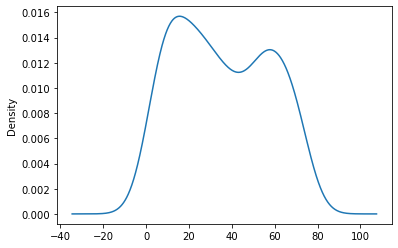

In [31]:
X.tenure.plot(kind='kde')

In [18]:
y=ChurnData['churn']
y.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: churn, dtype: float64

# normalize the dataset:

In [32]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit(X).transform(X)

In [33]:
X[:,0]

array([-1.13518441, -0.11604313, -0.57928917,  0.11557989, -1.32048283,
        1.505318  ,  0.3008783 , -1.22783362, -0.02339392,  0.62515053,
        0.94942275,  0.53250132,  0.94942275,  1.5516426 , -0.9035614 ,
       -1.45945664, -0.39399075,  0.76412434,  1.32001958, -1.08885981,
       -0.02339392, -1.04253521,  0.43985211, -1.50578124,  0.81044894,
       -0.85723679,  1.08839657,  0.99574736, -1.50578124, -1.45945664,
       -0.30134155,  1.32001958, -0.62561377, -0.11604313, -0.81091219,
        1.36634419,  0.16190449, -0.34766615,  0.48617672,  0.34720291,
       -0.67193838,  0.81044894,  0.67147513,  0.34720291, -0.11604313,
        0.43985211, -0.34766615,  0.06925528,  1.64429181,  1.04207196,
        0.02293068, -0.44031536, -1.04253521, -0.34766615, -1.59843045,
       -0.949886  , -1.08885981, -1.41313204, -0.16236774, -0.9962106 ,
        1.4589934 ,  1.13472117,  1.59796721, -1.36680743,  0.11557989,
        0.81044894,  0.06925528,  1.18104577, -0.71826298,  1.69

In [35]:
tenure=pd.Series(X[:,0])

<AxesSubplot:ylabel='Density'>

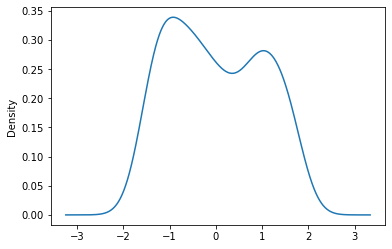

In [36]:
tenure.plot(kind='kde')

# Train/Test dataset

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=4, train_size=0.8)


# Modeling (Logistic Regression with Scikit-learn)

In [41]:
from sklearn.linear_model import LogisticRegression
LR_Model=LogisticRegression().fit(X_train,y_train)

In [42]:
LR_Model

LogisticRegression()

# Attribute of Logistic Regression  Model

In [43]:
LR_Model.classes_

array([0., 1.])

In [44]:
LR_Model.coef_

array([[-0.84627527, -0.17536428, -0.12501496, -0.01149591,  0.0608408 ,
        -0.23144436,  0.75179633]])

In [45]:
LR_Model.intercept_

array([-1.47140425])

In [46]:
LR_Model.n_features_in_

7

In [49]:
LR_Model.n_iter_

array([12])

#  score(X, y, sample_weight=None)[source]

  -  Return the mean accuracy on the given test data and labels.

In [50]:
LR_Model.score(X_test,y_test)

0.725

# Classification metrics

### The confusion_matrix

The confusion_matrix function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class (Wikipedia and other references may use different convention for axes).
confusion_matrix(y_true,y_pred, *,labels=None,sample_weight=None,normalize=None,)

In [53]:
y_pred=LR_Model.predict(X_test)

In [54]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0.])

In [56]:
y_test.values

array([0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 0.])

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[25,  0],
       [11,  4]], dtype=int64)

# The classification_report
- The classification_report function builds a text report showing the main classification metrics.

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.69      1.00      0.82        25
         1.0       1.00      0.27      0.42        15

    accuracy                           0.73        40
   macro avg       0.85      0.63      0.62        40
weighted avg       0.81      0.72      0.67        40



In [61]:
len(y_test)

40

# Lab Exercise2

The Goal: Predict whether a passenger survived or not. 0 for not surviving, 1 for surviving
- Describing the data
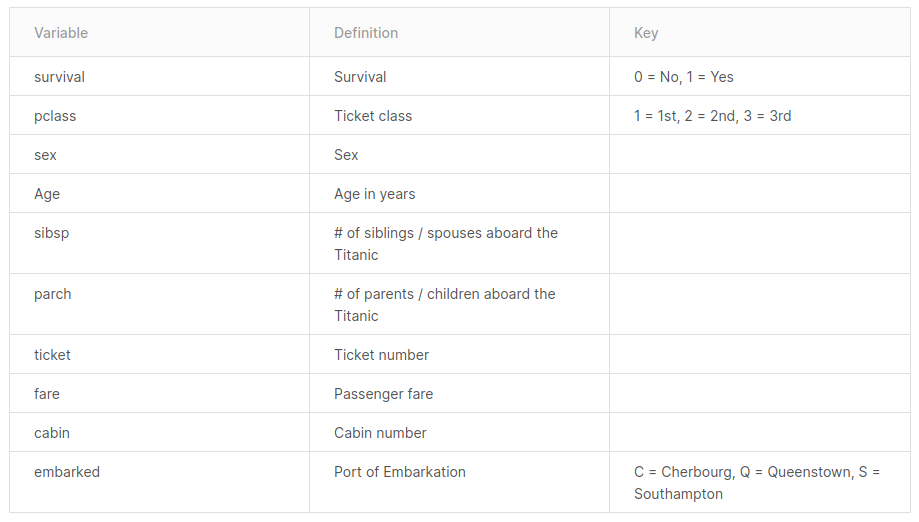


In [62]:
import numpy as np
import pandas as pd


In [63]:
# load training feature  / X_train
url1="https://raw.githubusercontent.com/Edubridge-karthik/EXL-CHENNAI---8410-and-PUNE-8414-DA--Batch/main/EXL-CHENNAI%20and%20PUNE-%20DA/Machine%20Learning%20algorithm/Titanic_data_set/train_features.csv"
train_features=pd.read_csv(url1)

In [66]:
X_train=train_features
X_train.head()

,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,2,0,62.0,10.5000,0,0
1,3,0,8.0,29.1250,5,0
2,3,0,32.0,56.4958,0,0
3,3,1,20.0,9.8250,1,0
4,2,1,28.0,13.0000,0,0


In [70]:
X_train.shape

(534, 6)

In [75]:
# load training label/ y_train
url2='https://raw.githubusercontent.com/Edubridge-karthik/EXL-CHENNAI---8410-and-PUNE-8414-DA--Batch/main/EXL-CHENNAI%20and%20PUNE-%20DA/Machine%20Learning%20algorithm/Titanic_data_set/train_labels.csv'
train_labels=pd.read_csv(url2,names=["target"])
y_train=train_labels
y_train.head()


,target
0,1
1,0
2,1
3,0
4,1


In [76]:
y_train.shape

(534, 1)

In [77]:
# build the model
from sklearn.linear_model import LogisticRegression
LRModel=LogisticRegression().fit(X_train,y_train)

C:\Users\karthick\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
LRModel.coef_

array([[-0.724508  ,  2.62205779, -0.03298742,  0.0031487 , -0.2276906 ,
         0.45449282]])

In [79]:
LRModel.intercept_

array([1.0855421])

# model score

In [80]:
# load test data / X_test
url3="https://raw.githubusercontent.com/Edubridge-karthik/EXL-CHENNAI---8410-and-PUNE-8414-DA--Batch/main/EXL-CHENNAI%20and%20PUNE-%20DA/Machine%20Learning%20algorithm/Titanic_data_set/test_features.csv"
X_test=pd.read_csv(url3)
X_test.head()

,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,3,0,18.000000,20.2125,2,0
1,3,0,29.699118,8.0500,0,0
2,3,0,40.500000,7.7500,0,0
3,3,1,31.000000,20.5250,2,0
4,2,0,32.000000,10.5000,0,0


In [83]:
X_test.shape

(179, 6)

In [82]:
# load test data / y_test
url4='https://raw.githubusercontent.com/Edubridge-karthik/EXL-CHENNAI---8410-and-PUNE-8414-DA--Batch/main/EXL-CHENNAI%20and%20PUNE-%20DA/Machine%20Learning%20algorithm/Titanic_data_set/test_labels.csv'
y_test=pd.read_csv(url4,names=["target"])
y_test.head()

,target
0,0
1,0
2,0
3,1
4,0


In [84]:
y_test.shape

(179, 1)

In [87]:
# model score
print(LRModel.score(X_test,y_test))

0.8268156424581006


In [ ]:
Pclass 	Sex 	Age 	Fare 	Family_cnt 	Cabin_ind

In [86]:
new_data=[[1,0,25,20,0,0]]
LRModel.predict(new_data)

C:\Users\karthick\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [88]:
#y_predict
y_pred=LRModel.predict(X_test)

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1], dtype=int64)

In [91]:
result=pd.DataFrame({"Survied or not":y_pred}, dtype='int')

In [92]:
result.to_csv("result.csv")